### **Clustering with the Make_Moons Dataset :**
**Introduction :**


Clustering is a key technique in unsupervised machine learning, used to identify natural groupings within data.

This project explores the `make_moons` dataset, a synthetic dataset often used to evaluate clustering and classification algorithms. It consists of two interlocking crescent shapes, presenting a challenging scenario for traditional clustering methods. The goal is to apply clustering techniques to uncover the inherent structure of the dataset and evaluate their performance.

## Objectives

The primary goal of this project is to use clustering techniques to uncover patterns and groupings within the `make_moons` dataset. By evaluating and comparing the performance of different clustering models, this project aims to demonstrate the potential of unsupervised learning in discovering hidden structures in challenging, non-linear datasets.


# **Data Overview :**

In [ ]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [ ]:
from sklearn.datasets import make_moons
X, _ = make_moons(n_samples=300, noise=0.1)

type(X)

numpy.ndarray

In [ ]:
moon = pd.DataFrame(X, columns=['x1', 'x2'])
moon.head()

,x1,x2
0,0.411009,0.855852
1,0.844627,0.300639
2,-1.020483,0.342795
3,0.201860,0.961438
4,1.957797,0.227060


In [ ]:
moon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      300 non-null    float64
 1   x2      300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [ ]:
moon.describe()

,x1,x2
count,300.000000,300.000000
mean,0.501554,0.242625
std,0.880234,0.499485
min,-1.120816,-0.668647
25%,-0.084827,-0.190702
50%,0.531310,0.251047
75%,1.061067,0.701265
max,2.113808,1.198681


<Axes: xlabel='x1', ylabel='x2'>

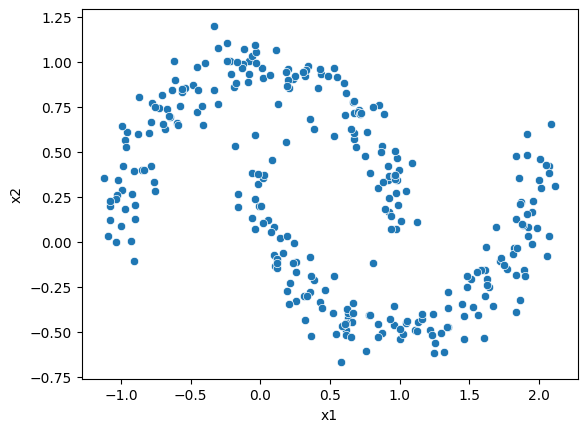

In [ ]:
#plot the datset
sns.scatterplot(x='x1', y='x2', data=moon)

<Axes: >

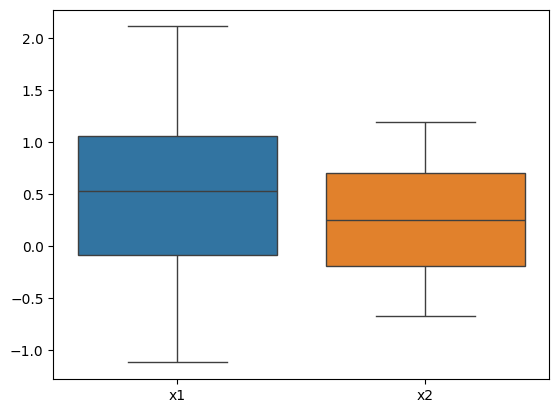

In [ ]:
# detect outliers
sns.boxplot(data=moon)

# **1- using Kmeans**

In [ ]:
# apply feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
moon_scaled = scaler.fit_transform(moon)

In [ ]:
import pandas as pd
# Choosing the optimal k number of clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
ssd = []
score = []

for k in range(2,16):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(moon_scaled)
    ssd.append(kmeans.inertia_)

    # calculate the silhoutte score againest the number of clusters
    score.append(silhouette_score(moon_scaled, kmeans.labels_))


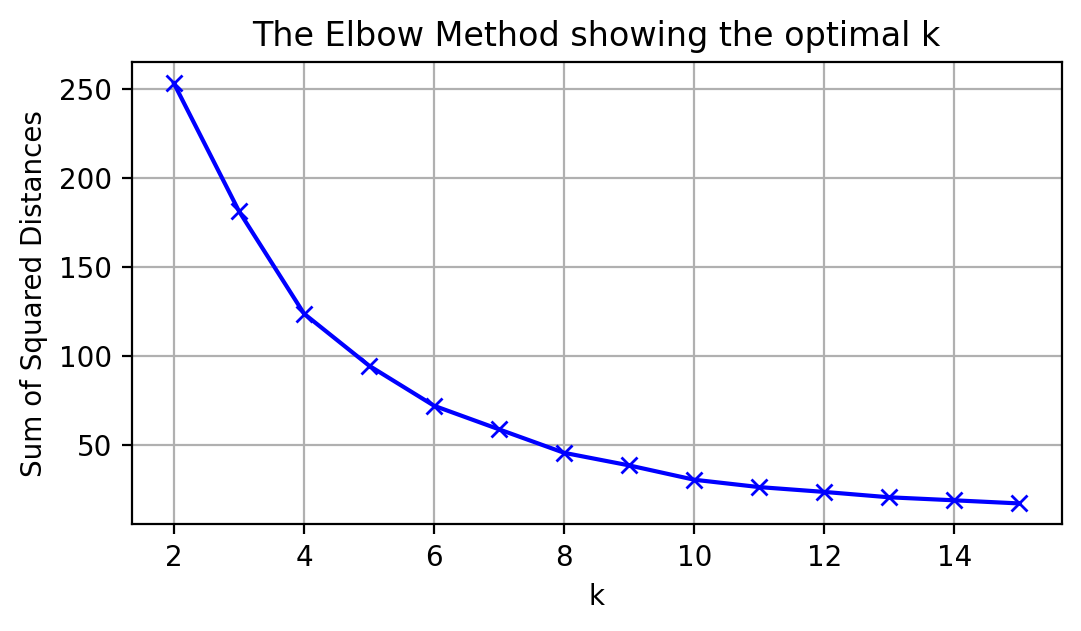

In [ ]:
# Elbow plot

plt.figure(figsize=(6, 3), dpi=200)
plt.plot(range(2, 16), ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('The Elbow Method showing the optimal k')
plt.grid(True)
plt.show()

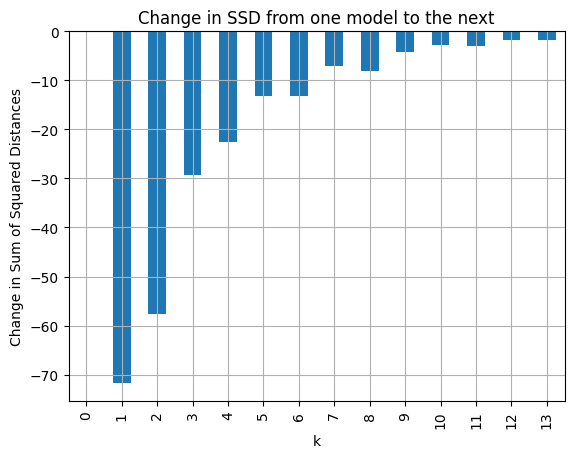

In [ ]:
#bar plot showing the SSD difference from the previous cluster.

pd.Series(ssd).diff()
pd.Series(ssd).diff().plot(kind='bar')
plt.xlabel('k')
plt.ylabel('Change in Sum of Squared Distances')
plt.title('Change in SSD from one model to the next')
plt.grid(True)
plt.show()


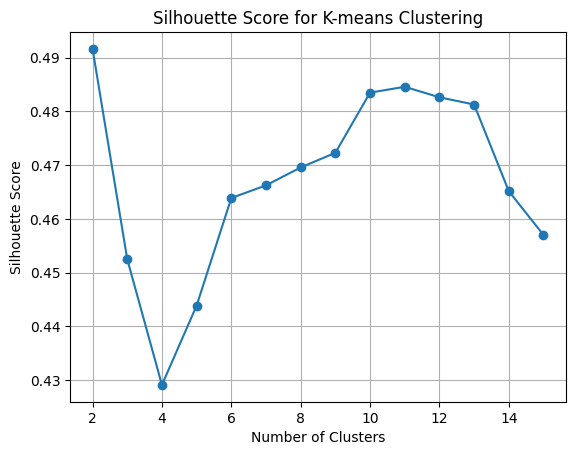

In [ ]:
# plot the silhoutte score agianest the number of clusters
plt.plot(range(2, 16), score, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for K-means Clustering")
plt.grid(True)
plt.show()

**Depends on these plots we choose the best model when k = 4**

In [ ]:
#k =4
kmeans = KMeans(n_clusters=4 , init='k-means++', n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(moon_scaled)
score4 =silhouette_score(moon_scaled, y_kmeans)
score4

0.42909466582008293

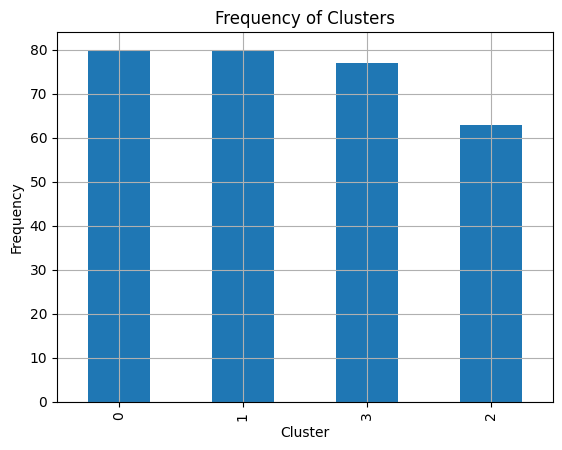

,count
cluster,
0,80
1,80
3,77
2,63


In [ ]:
# count the frequency on the clusters
pd.Series(y_kmeans).value_counts()

# plot the bar chart
pd.Series(y_kmeans).value_counts().plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Frequency of Clusters')
plt.grid(True)
plt.show()

# appned clusters label to data set
moon_kmeans = moon.copy()
moon_kmeans ['cluster'] = y_kmeans
moon_kmeans['cluster'].value_counts()


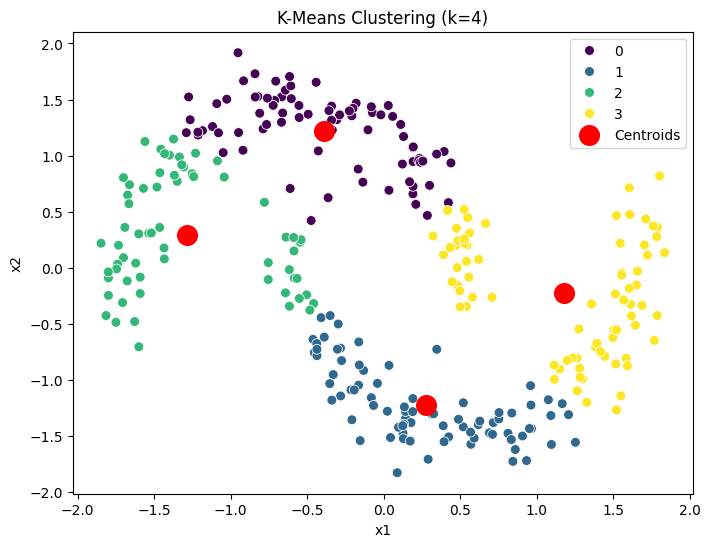

In [ ]:
# Visualize the clusters with their correspoding centroids
plt.figure(figsize=(8,6))
sns.scatterplot(x=moon_scaled[:, 0], y=moon_scaled[:, 1], hue=y_kmeans, s=50, palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, label='Centroids')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('K-Means Clustering (k=4)')
plt.legend()
plt.show()

- K-Means produced circular clusters that did not align well with the dataset's crescent shapes



---



---



# **2- Using Agglomerative Clustering**

In [ ]:
# Agglomerative Clustering

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

score = []

for k in range(2, 16):

    hierarchical_model = AgglomerativeClustering(n_clusters=k)
    hierarchical_model.fit(moon_scaled)

    #calculate the silhoutte score
    score.append(silhouette_score(moon_scaled, hierarchical_model.labels_))

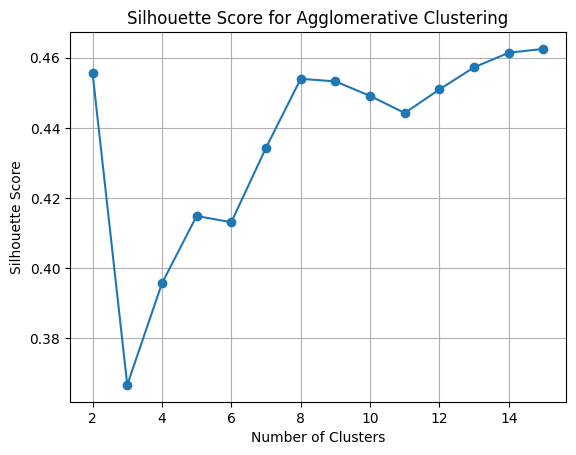

In [ ]:
# plot silhoutte score

plt.plot(range(2, 16), score, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Agglomerative Clustering")
plt.grid(True)
plt.show()

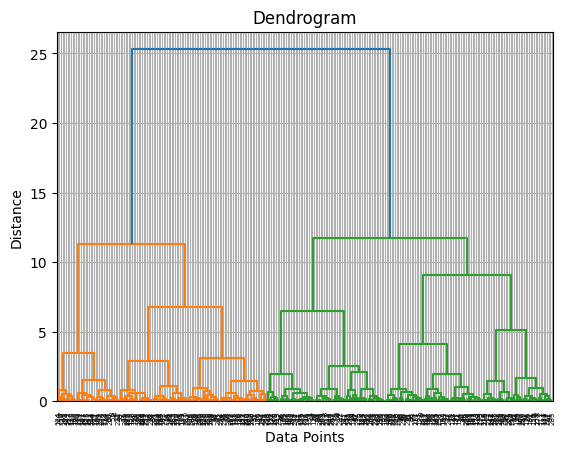

In [ ]:
#plot the dendrogram

from scipy.cluster.hierarchy import dendrogram, linkage

linkage_data = linkage(moon_scaled, method='ward')
dendrogram(linkage_data)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

In [ ]:
# K= 5
hierarchical_model = AgglomerativeClustering(n_clusters=5)
aggo_labels = hierarchical_model.fit_predict(moon_scaled)

#calculate the silhoutte score

silhouette_score(moon_scaled, aggo_labels)



0.4148864360294238

cluster
0    89
1    43
2    72
3    38
4    58
Name: cluster, dtype: int64


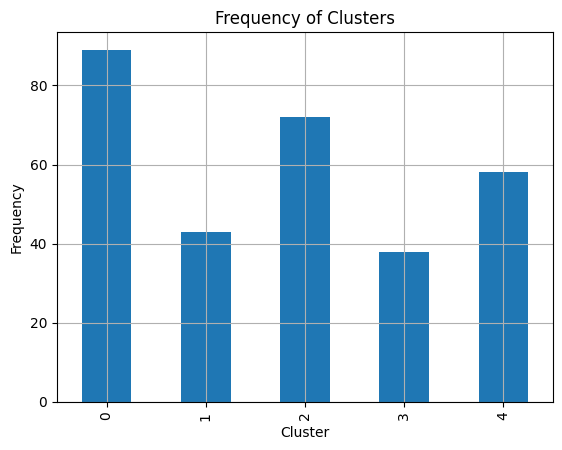

In [ ]:
# appned clusters label to data set
moon_hierarchical = moon.copy()
moon_hierarchical['cluster'] = aggo_labels

# count the frequency of the clusters
cluster_counts = moon_hierarchical.groupby('cluster')['cluster'].count()
print(cluster_counts)

# plot the bar chart
cluster_counts.plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Frequency of Clusters')
plt.grid(True)
plt.show()



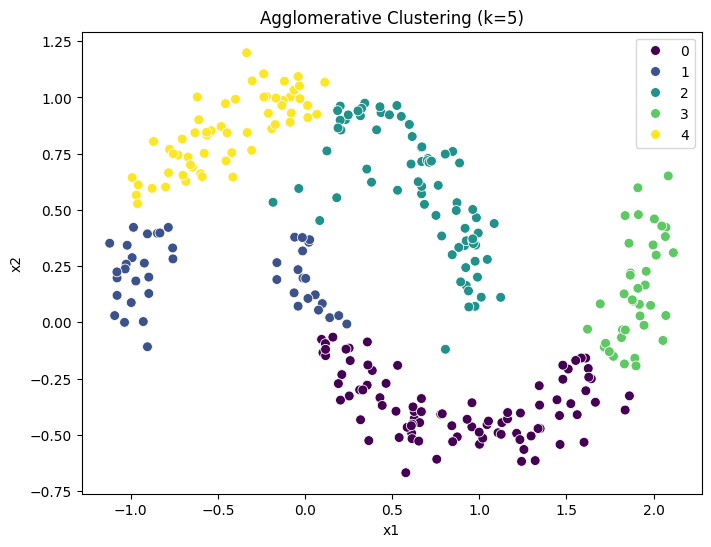

In [ ]:
# Visualize the clusters for Agglomerative Clustering
plt.figure(figsize=(8,6))
sns.scatterplot(x = moon_hierarchical['x1'], y = moon_hierarchical['x2'], hue = aggo_labels, s=50, palette='viridis')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Agglomerative Clustering (k=5)')
plt.legend()
plt.show()

# **3- Using DBSCAN clustering :**

In [ ]:
# DBSCAN modeling

from sklearn.cluster import DBSCAN

# choose the best epsilon
outlier_percentage = []

for eps in np.linspace(0.001,3,50):

    dbscan_model = DBSCAN(eps=eps) #defalut min_samples
    db_labels =  dbscan_model.fit_predict(moon_scaled)


    #outlier percentage
    perc_outliers = 100 * np.sum(dbscan_model.labels_ == -1) / len(db_labels)

    outlier_percentage.append(perc_outliers)


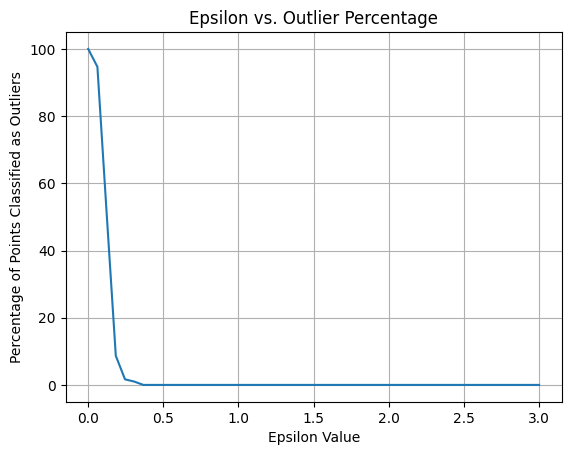

In [ ]:
# Visualize the relationship between epsilon and the percentage of outliers detected by DBSCAN.
sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_percentage )
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.title("Epsilon vs. Outlier Percentage")
plt.grid(True)
plt.show()

In [ ]:
# The epsilon value of 0.3 was selected based on the graph between epsilon and outlier percentage.
dbscan_model = DBSCAN(eps=0.3)
db_labels =  dbscan_model.fit_predict(moon_scaled)

#calculate the silhoutte score
silhouette_score(moon_scaled, db_labels)

0.1264694812603262

cluster
-1      3
 0    149
 1    148
Name: cluster, dtype: int64


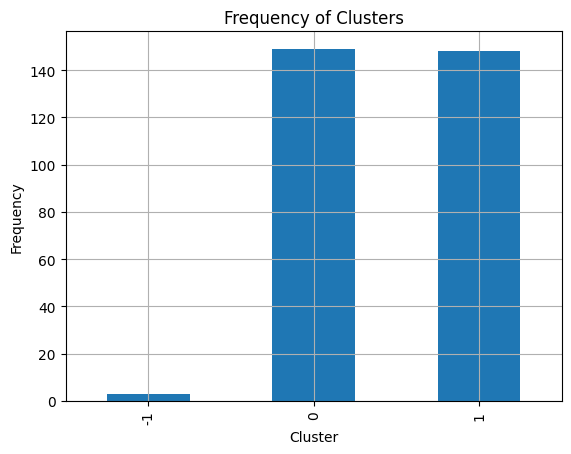

In [ ]:
# append cluster column
moon_dbscan = moon.copy()
moon_dbscan['cluster'] = db_labels

# count the frequency of the clusters
cluster_counts = moon_dbscan.groupby('cluster')['cluster'].count()
print(cluster_counts)
# bar chart for the frequency of the cluster
cluster_counts.plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Frequency of Clusters')
plt.grid(True)
plt.show()

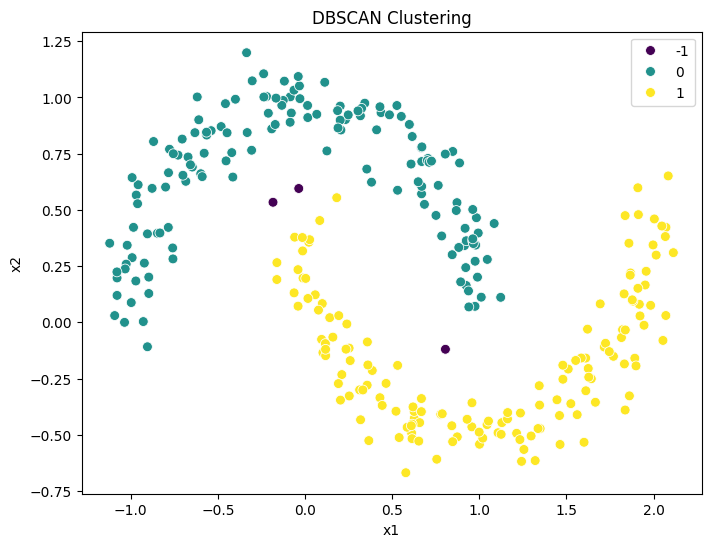

In [ ]:
# Visualize the clusters for DBSCAN
plt.figure(figsize=(8,6))
sns.scatterplot(x = moon_dbscan['x1'], y = moon_dbscan['x2'], hue = moon_dbscan['cluster'], s=50, palette='viridis')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('DBSCAN Clustering')
plt.legend()
plt.show()

#**Conclusion :**

In summary, three clustering algorithms (K-means, Agglomerative Clustering, and DBSCAN) were applied to the make_moons dataset.  
**K-means :** while simple, struggled with the non-circular nature of the data.

**Agglomerative clustering :** the algorithm provided a more flexible approach, capturing the crescent shapes better than K-means, but its performance was still limited by the shape of  data.

**DBSCAN :** known for its ability to identify clusters of arbitrary shapes, proved most effective in this scenario.  By selecting an appropriate epsilon value, DBSCAN successfully separated the two moons, demonstrating its capability to handle complex and non-linear data distributions. The silhouette scores and visualisations further reinforced these observations.